In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interface import config

In [2]:
from lib.tests import pad_delay_wrapper, mimo_pad_wrapper, mimo_convolve_wrapper
from lib.directions import calculate_coefficients
from lib import directions

In [3]:
np.set_printoptions(linewidth=110)
directions.calculate_delays_()[0, 0].reshape((8, 8))

array([[ 0.       ,  2.0309768,  4.0619535,  6.0929313,  8.123908 , 10.154885 , 12.185863 , 14.21684  ],
       [ 2.0309768,  4.0619535,  6.0929313,  8.123908 , 10.154885 , 12.185863 , 14.21684  , 16.247816 ],
       [ 4.0619535,  6.0929313,  8.123908 , 10.154885 , 12.185863 , 14.21684  , 16.247816 , 18.278795 ],
       [ 6.0929313,  8.123908 , 10.154885 , 12.185863 , 14.21684  , 16.247816 , 18.278795 , 20.30977  ],
       [ 8.123908 , 10.154885 , 12.185863 , 14.21684  , 16.247816 , 18.278795 , 20.30977  , 22.340748 ],
       [10.154885 , 12.185863 , 14.21684  , 16.247816 , 18.278795 , 20.30977  , 22.340748 , 24.371725 ],
       [12.185863 , 14.21684  , 16.247816 , 18.278795 , 20.30977  , 22.340748 , 24.371725 , 26.402702 ],
       [14.21684  , 16.247816 , 18.278795 , 20.30977  , 22.340748 , 24.371725 , 26.402702 , 28.43368  ]],
      dtype=float32)

In [4]:
whole_samples, adaptive_array = calculate_coefficients()

whole_samples.shape

(12, 12, 16)


(12, 12, 16)

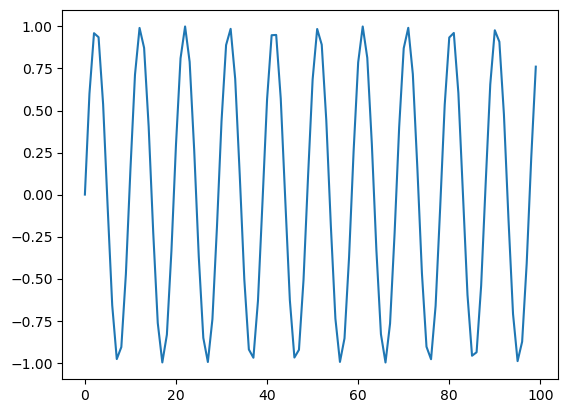

In [5]:
start_time = 0
end_time = 1
sample_rate = config.fs
time = np.arange(start_time, end_time, 1/sample_rate)
theta = 0
frequency = 5000
amplitude = 1
sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)

plt.plot(sinewave[:100])

(12, 12, 16)
(12, 12, 16)


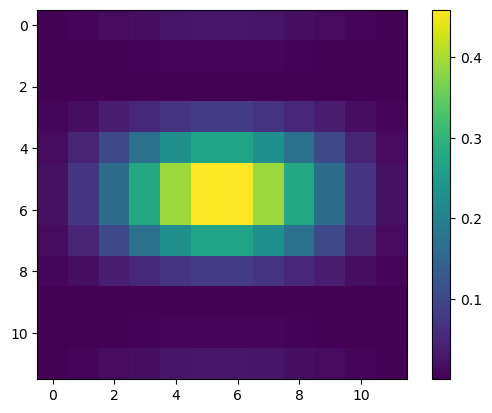

In [6]:
a = np.ones(3)

signals = np.repeat(sinewave[:config.N_SAMPLES], config.N_MICROPHONES, axis=0).reshape((config.N_SAMPLES, config.N_MICROPHONES)).T


signals = np.float32(signals)

# plt.plot(signals[0])

sc = plt.imshow(mimo_convolve_wrapper(signals))
plt.colorbar(sc)

# plt.imshow(mimo_pad_wrapper(signals))



In [10]:
pad_delay_wrapper(np.ones(1024, dtype=np.float32), np.zeros(1024, dtype=np.float32), 2)

array([0., 0., 1., ..., 1., 1., 1.], dtype=float32)

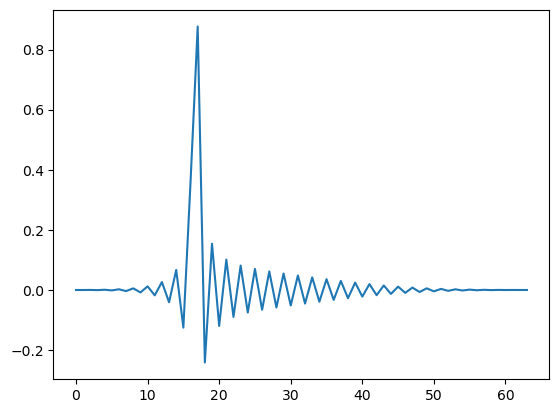

In [21]:

def get_h(delay, N=8):
    tau = - delay  # Fractional delay [samples].
    epsilon = 1e-9
    n = np.arange(N)

    sinc = n - (8 - 1) / 2 - (0.5 + tau) + epsilon

    h = np.sin(sinc*np.pi)/(sinc*np.pi)

    blackman = 0.42 - 0.5 * np.cos(2*np.pi * n / 8) + 0.08 * np.cos(4 * np.pi * n / 8)

    h *= blackman
    
    # Normalize to get unity gain.
    h /= np.sum(h)

    return h

def get_h(delay, N=64):
    
    epsilon = 1e-9

    tau = 0.5 - delay + epsilon # Fractional delay [samples].
    h = np.zeros(N, dtype=np.float32)

    sum_ = 0
    for i in range(N):
        hi = i - (N - 1) / 2 - tau
        hi = np.sin(hi*np.pi) / (hi * np.pi)
        n = i * 2 - N + 1

        black = 0.42 + 0.5 * np.cos(np.pi * n / (N - 1 + epsilon)) + 0.08 * np.cos(2 * np.pi * n / (N - 1 + epsilon))
        hi *= black
        sum_ += hi
        h[i] = hi

    h /= sum_
    return h
plt.plot(get_h(15.32, N=64))